In [73]:
import pandas as pd
import numpy as np
import os

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [75]:
df = pd.read_csv('Generalization results - Newest Result.csv')
# deepshap results for bert models are not ready yet
df = df.dropna()

In [45]:
# Overall performance
df = df.drop(df[(df.TestData=='empathy')|(df.TrainData=='empathy')].index)

In [63]:
# pos/neg sentiment
df2 = df.copy()
df2 = df2[(df2.TrainData=='yelp_subset')|(df2.TrainData=='amazon_toys_subset')|(df2.TrainData=='amazon_finefood_subset')|(df2.TrainData=='nrc_joy')]
df2 = df2.drop(df2[(df2.TestData=='empathy')].index)
df = df2

In [76]:
# emotion
df3 = df.copy()
df3 = df3[(df3.TrainData=='nrc_joy')|(df3.TrainData=='nrc_surprise')|(df3.TrainData=='nrc_sadness')|(df3.TrainData=='nrc_fear')|(df3.TrainData=='nrc_anger')]
df3 = df3.drop(df3[(df3.TestData=='yelp_subset')|(df3.TestData=='amazon_toys_subset')|(df3.TestData=='amazon_finefood_subset')|(df3.TestData=='empathy')|(df3.TestData=='emobank')].index)
df = df3

In [77]:
print(df.TrainData.value_counts())

nrc_joy         36
nrc_anger       36
nrc_sadness     36
nrc_fear        36
nrc_surprise    36
Name: TrainData, dtype: int64


## In sample Performance

In [78]:
sub = df[df.Within == True]

In [79]:
sub.head()

,Method,TrainData,TestData,modelAcc,modelF1,lexiconAcc,lexiconF1,Within
4,SVM_STI,nrc_joy,nrc_joy,0.739,0.732,0.734,0.727,True
45,SVM_STI,nrc_surprise,nrc_surprise,0.700,0.704,0.703,0.706,True
49,SVM_STI,nrc_sadness,nrc_sadness,0.709,0.711,0.697,0.697,True
53,SVM_STI,nrc_fear,nrc_fear,0.751,0.747,0.756,0.754,True
57,SVM_STI,nrc_anger,nrc_anger,0.759,0.759,0.762,0.765,True


In [80]:
def getStats(x):
    
    output = []
    
    for i in ['modelAcc','modelF1','lexiconAcc','lexiconF1']:
        output += [ np.round(np.mean(x[i]),2), np.round(np.std(x[i]),2) ]
    
    return output

output = sub.groupby(['Method']).apply(lambda x : getStats(x))
output = output.reset_index()

columnList = []

for i in ['modelAcc','modelF1','lexiconAcc','lexiconF1']:
    for j in ['mean','std']:
        columnList.append(f'{i}_{j}')

a = output[0].apply(pd.Series)
a.columns = columnList


output = pd.concat([output, a],axis = 1)

In [81]:
for i in range(len(output)):
    
    x = output.iloc[i]
    
    print(f"{x.Method} & {x.modelAcc_mean}+-{x.modelAcc_std} & {x.modelF1_mean}+-{x.modelF1_std} & {x.lexiconAcc_mean}+-{x.lexiconAcc_std} & {x.lexiconF1_mean}+-{x.lexiconF1_std} \\\\  \hline")
    
#     & {np.round(-x.modelAcc_mean+x.lexiconAcc_mean,2)} 
    
    

DistilBERT_Mask & 0.78+-0.02 & 0.77+-0.02 & 0.71+-0.03 & 0.69+-0.03 \\  \hline
DistilBERT_Partition & 0.78+-0.02 & 0.77+-0.02 & 0.74+-0.04 & 0.73+-0.04 \\  \hline
FFN_Deep & 0.73+-0.04 & 0.69+-0.06 & 0.72+-0.03 & 0.71+-0.03 \\  \hline
FFN_Partition & 0.73+-0.04 & 0.69+-0.06 & 0.7+-0.03 & 0.7+-0.03 \\  \hline
FFN_STI & 0.73+-0.04 & 0.69+-0.06 & 0.7+-0.03 & 0.7+-0.03 \\  \hline
Roberta_Mask & 0.79+-0.03 & 0.77+-0.05 & 0.68+-0.02 & 0.66+-0.05 \\  \hline
Roberta_Partition & 0.79+-0.03 & 0.77+-0.05 & 0.82+-0.04 & 0.81+-0.05 \\  \hline
SVM_STI & 0.73+-0.02 & 0.73+-0.02 & 0.73+-0.03 & 0.73+-0.03 \\  \hline
diversityLSTM_Attention & 0.91+-0.08 & 0.91+-0.09 & 0.72+-0.03 & 0.71+-0.03 \\  \hline


### Out of Sample Performance

In [82]:
sub = df[df.Within == False]

def getStats(x):
    
    output = []
    
    for i in ['modelAcc','modelF1','lexiconAcc','lexiconF1']:
        output += [ np.round(np.mean(x[i]),2), np.round(np.std(x[i]),2) ]
    
    return output

output = sub.groupby(['Method']).apply(lambda x : getStats(x))
output = output.reset_index()

columnList = []

for i in ['modelAcc','modelF1','lexiconAcc','lexiconF1']:
    for j in ['mean','std']:
        columnList.append(f'{i}_{j}')

a = output[0].apply(pd.Series)
a.columns = columnList


output = pd.concat([output, a],axis = 1)

In [83]:
for i in range(len(output)):
    
    x = output.iloc[i]
    
    print(f"{x.Method} & {x.modelAcc_mean}+-{x.modelAcc_std} & {x.modelF1_mean}+-{x.modelF1_std} & {x.lexiconAcc_mean}+-{x.lexiconAcc_std} & {x.lexiconF1_mean}+-{x.lexiconF1_std} \\\\  \hline")
    
#     & {np.round(-x.modelAcc_mean+x.lexiconAcc_mean,2)} 

DistilBERT_Mask & 0.65+-0.08 & 0.59+-0.11 & 0.62+-0.05 & 0.61+-0.05 \\  \hline
DistilBERT_Partition & 0.65+-0.08 & 0.59+-0.11 & 0.63+-0.04 & 0.63+-0.05 \\  \hline
FFN_Deep & 0.59+-0.04 & 0.5+-0.08 & 0.64+-0.05 & 0.63+-0.05 \\  \hline
FFN_Partition & 0.59+-0.04 & 0.5+-0.08 & 0.6+-0.04 & 0.6+-0.04 \\  \hline
FFN_STI & 0.59+-0.04 & 0.5+-0.08 & 0.6+-0.04 & 0.6+-0.04 \\  \hline
Roberta_Mask & 0.65+-0.08 & 0.55+-0.15 & 0.6+-0.05 & 0.57+-0.06 \\  \hline
Roberta_Partition & 0.65+-0.08 & 0.55+-0.15 & 0.65+-0.03 & 0.64+-0.03 \\  \hline
SVM_STI & 0.63+-0.04 & 0.63+-0.04 & 0.63+-0.04 & 0.62+-0.04 \\  \hline
diversityLSTM_Attention & 0.57+-0.05 & 0.49+-0.15 & 0.57+-0.05 & 0.58+-0.06 \\  \hline


# Visualization

In [71]:
df.Method.unique()

array(['SVM_STI', 'FFN_STI', 'FFN_Partition', 'FFN_Deep',
       'DistilBERT_Mask', 'DistilBERT_Partition', 'Roberta_Mask',
       'Roberta_Partition', 'diversityLSTM_Attention'], dtype=object)

In [72]:
#Change methods to plot


# method_list = ['SVM', 'FFN', 'diversityLSTM_Attention', 'FFN_Deep', 'FFN_Partition',
#                'Roberta_Mask', 'DistilBERT_Mask', 'Roberta_Partition', 'DistilBERT_Partition',
#                 'Roberta_Deep', 'DistilBERT_Deep']

# method_list = ['Roberta_Mask', 'DistilBERT_Mask', 'Roberta_Partition', 'DistilBERT_Partition','Roberta_Deep', 'DistilBERT_Deep']

# method_list = ['DistilBERT_Mask',  'DistilBERT_Partition','DistilBERT_Deep']

# method_list = ['Roberta_Mask', 'Roberta_Partition', 'Roberta_Deep']

# method_list = ['FFN', 'FFN_Deep', 'FFN_Partition']

# method_list = ['FFN', 'FFN_Partition']


# method_list = ['SVM_STI', 'diversityLSTM_Attention', 'FFN_Deep','Roberta_Partition', 'DistilBERT_Partition']

method_list = ['SVM_STI', 'FFN_STI', 'FFN_Partition', 'FFN_Deep',
       'DistilBERT_Mask', 'DistilBERT_Partition', 'Roberta_Mask',
       'Roberta_Partition', 'diversityLSTM_Attention']

### Lexicon Accuracy

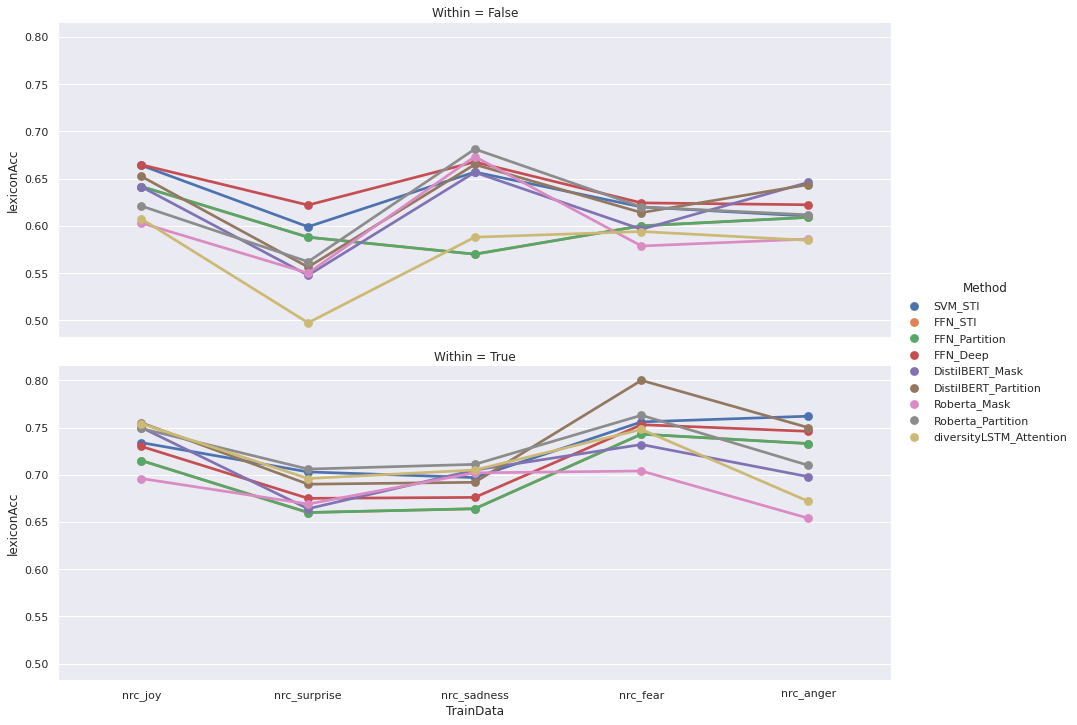

In [14]:
g = sns.catplot(data=df[df.Method.isin(method_list)], x="TrainData", y="lexiconAcc", hue="Method", row = 'Within', kind="point", ci = None, aspect = 2.5)
g.savefig('emotion_lexicon_accuracy.png')

### Model Accuracy

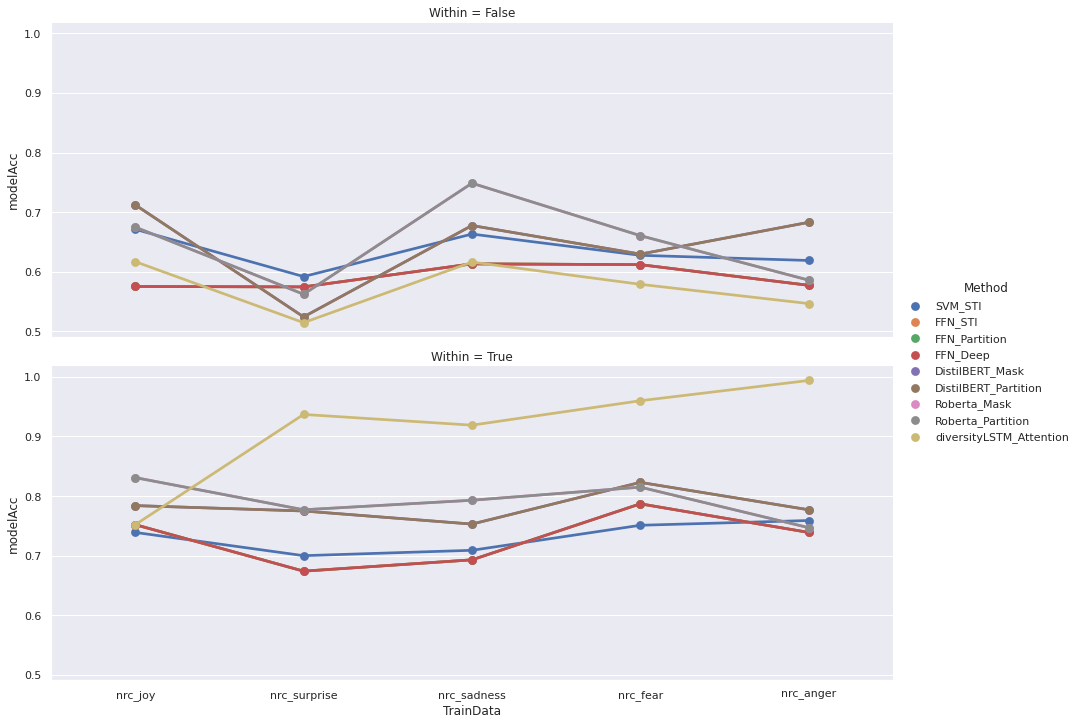

In [15]:
g = sns.catplot(data=df[df.Method.isin(method_list)], x="TrainData", y="modelAcc", hue="Method", row = 'Within', kind="point", ci = None, aspect = 2.5)
g.savefig('emotion_model_accuracy.png')

### Model F1

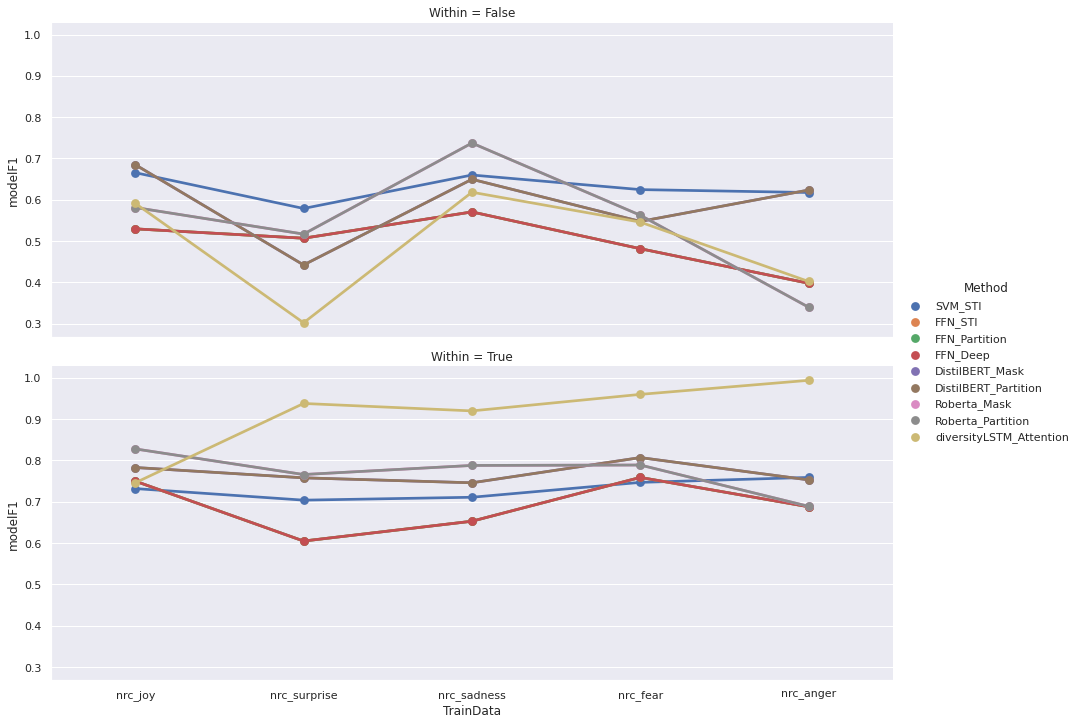

In [16]:
g = sns.catplot(data=df[df.Method.isin(method_list)], x="TrainData", y="modelF1", hue="Method", row = 'Within', kind="point", ci = None, aspect = 2.5)
g.savefig('emotion_model_f1.png')

### Lexicon F1

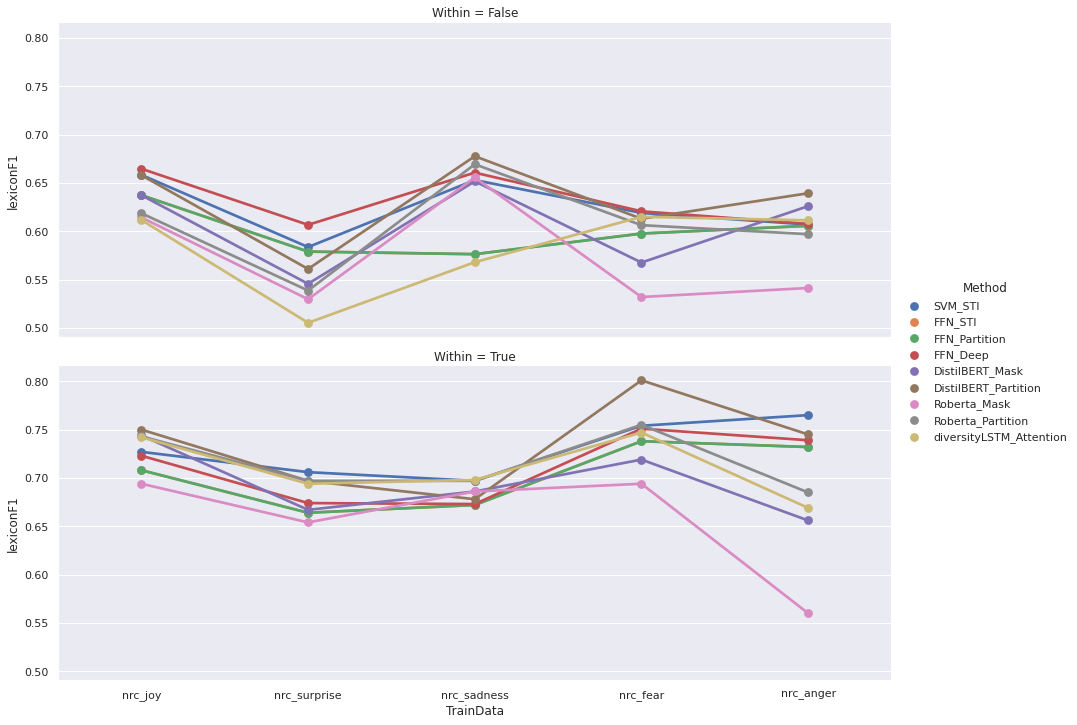

In [17]:
g = sns.catplot(data=df[df.Method.isin(method_list)], x="TrainData", y="lexiconF1", hue="Method", row = 'Within', kind="point", ci = None, aspect = 2.5)
g.savefig('emotion_lexicon_f1.png')